<a href="https://colab.research.google.com/github/hanbiphyun/ESSA_YB/blob/main/ESAA_YB_week4_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##CH2. 사이킷런으로 시작하는 머신러닝
- 사이킷런 : 파이썬 머신러닝 라이브러리
- 특징 : 다양한 알고리즘과 개발을 위한 편리한 프레임워크와 API 제공

In [5]:
import sklearn

print(sklearn.__version__)

1.6.1


###첫번째 머신러닝 만들어보기 - 붓꽃 품종 예측
: 붓꽃의 품종 분류하기 - 꽃잎의 길이, 너비, 꽃받침의 길이, 너비 피처
- 분류 : 지도학습 방법 = 레이블 데이터로 모델 학습 후 별도의 테스트 데이터 세트에서 미지의 레이블 예측
- sklearn.datasets 내의 모듈 : 사이킷런 자체적으로 데이터 세트 생성 모듈의 모임
- sklearn.tree 내의 모듈 : 트리 기반 ML 알고리즘 구현한 클래스의 모임
- sklearn.model_selection : 학습데이터와 검증 데이터, 예측 데이터로 데이터 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 모듈의 모임
    -> 하이퍼파라미터 : 최적의 학습을 위해 직접 입력하는 파라미터들 -> 알고리즘 성능 튜닝 가능

###붓꽃데이터
- 의사 결정 트리 알고리즘 사용-> DecisionTreeClassifier 적용
- 데이터 세트-> 학습 + 테스트 데이터로 분리하는 train_test_split() 함수사용

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import pandas as pd

#붓꽃 데이터 세트를 로딩합니다.
iris=load_iris()

#iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있습니다.
iris_data=iris.data

#iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다.
iris_label=iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

#붖꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다.
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


- 피처 -> sepal length, sepal width, petal length, petal width
- 레이블 -> 0 = Setosa 품종, 1 = versicolor 품종, 2 = virginica 품종

In [7]:
#학습용 데이터와 테스트용 데이터 분리
#train_test_split() API -> test_size 파라미터 입력값의 비율로 분할

X_train, X_test, y_train, y_test=train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)
#피처 데이터 세트, 레이블 데이터 세트, 테스트 데이터 세트, 난수 발생값 순서

In [13]:
#DecisionClassifier 객체 생성
df_clf=DecisionTreeClassifier(random_state=11)

#학습 수행
df_clf.fit(X_train, y_train)

#학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
#위 객체의 predict() 메서드에 테스트 데이터 세트 입력 시 예측값 반환
pred=df_clf.predict(X_test)

#정확도 측정-> accuracy_score() 함수 제공
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


- 프로세스
 1. 데이터 세트 분리: 데이터를 학습 데이터와 테스트 데이터로 분리합니다.
 2. 모델 학습: 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습시킵니다.
 3. 예측 수행: 학습된 ML 모델을 이용해 테스트 데이터의 분류(즉, 붓꽃 종류)를 예측합니다.
 4. 평가: 이렇게 예측된 결괏값과 테스트 데이터의 실제 결괏값을 비교해 ML 모델 성능을 평가합니다

###3. 사이킷런의 기반 프레임워크 익히기
> Estimator 이해 및 fit(), predict() 메서드
- 사이킷런 : ML 모델 학습을 위한 fit(), 학습된 모델의 예측을 위한 predict() 메서드 제공
- 분류 알고리즘 구현한 클래스 : Classifier
- 회귀 알고리즘 구현한 클래스 : Regressor

    -> 합해서 Estimator 클래스
- Estimator 인자로 받은 것에 대해 cross_val_score(), GridSearchCV.fit() 함수 내에서 Estimator의 fit(), predict() 호출해 평가하거나 하이퍼 파라미터 튜닝 수행함
- 비지도 학습(차원 축소, 클러스터링, 피처 추출) 구현 -> fit(), transform() 적용

*여기서 fit()은 학습 X, 데이터 변환하기 위한 구조 맞추는 작업*

*이후 차원 변환, 클러스터링, 피처 추출 등 작업은 transform()으로 수행*

**사이킷런의 주요 모듈**
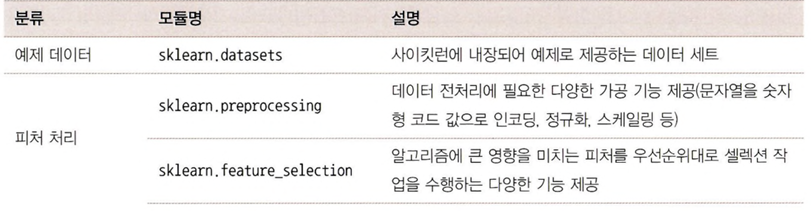
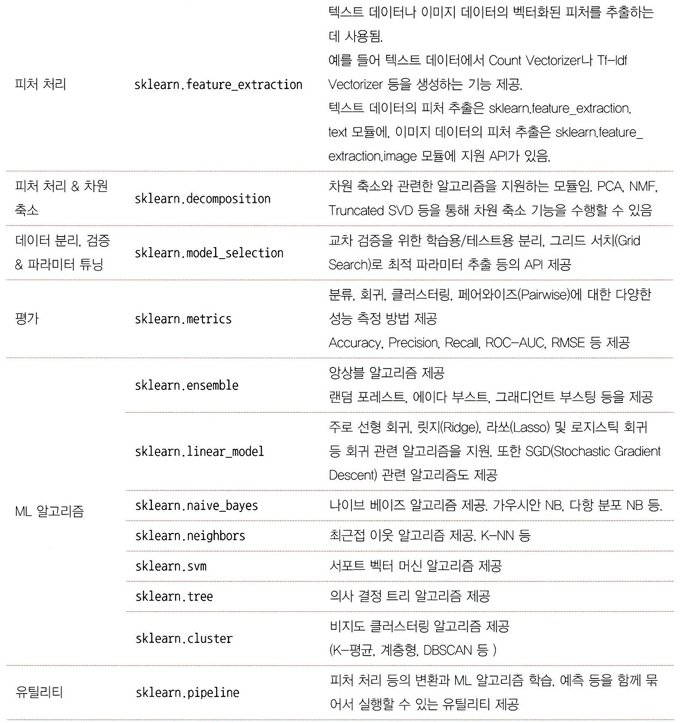

**내장된 예제 데이터 세트**
datasets.load_boston()
 datasets.load_breast_cancer()
 datasets.load_diabetes()
 datasets.load_digits()
 datasets.load_iris()
설명
1. 회귀 용도이며, 미국 보스턴의 집 피처들과 가격에 대한 데이터 세트
2. 분류 용도이며, 위스콘신 유방암 피처들과 악성/음성 레이블 데이터 세트
3. 회귀 용도이며, 당뇨 데이터 세트
4. 분류 용도이며, 0에서 9까지 숫자의 이미지 픽셀 데이터 세트
5. 분류 용도이며, 붓꽃에 대한 피처를 가진 데이터 세트
- datasets.make_classification() : 분류를 위한 데이터 세트 만듦. 노이즈 효과를 위한 데이터 무작위 생성.
- datasets.make_blobs() : 클러스터링을 위한 데이터 세트 무작위 생성.
 ■ data는 피처의 데이터 세트를 가리킵니다.
 ■ target은 분류 시 레이블 값 회귀일 때는 숫자 결괏값 데이터 세트입니다..
 ■target_names는 개별 레이블의 이름을 나타냅니다.
 ■ feature_names는 피처의 이름을 나타냅니다.
 ■ DESCR은 데이터 세트에 대한 설명과 각 피처의 설명을 나타냅니다.

In [9]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))
#Bunch 클래스 - 파이썬 딕셔너리 자료형과 유사하다 -> key 값 확인

<class 'sklearn.utils._bunch.Bunch'>


In [10]:
keys=iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [11]:
#피처 데이터 값 추출하기 위해선 데이터 세트.data 혹은 ['data'] 이용
print('\n feature_names 의 type:',type(iris_data.feature_names))
print(' feature_names 의 shape:',len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names의 type:', type(iris_data.target_names))
print(' target_names의 shape:', len(iris_data.target_names))
print(iris_data.target_names)

print('\n data의 type:', type(iris_data.data))
print(' data의 shape:', iris_data.data.shape)
print(iris_data['data'])

print('\n target의 type:', type(iris_data.target))
print(' target의 shape:', iris_data.target.shape)
print(iris_data.target)


 feature_names 의 type: <class 'list'>
 feature_names 의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names의 type: <class 'numpy.ndarray'>
 target_names의 shape: 3
['setosa' 'versicolor' 'virginica']

 data의 type: <class 'numpy.ndarray'>
 data의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 

###4. MOdel Selection 모듈 소개
: 학습 데이터와 테스트 데이터 세트를 분리하거나 교차 검증 분할 및 평가, Estimator의 하이퍼 파라미터를 튜닝하기 위한 함수와 클래스 제공

- train_test_split() : 데이터 세트 분리

In [15]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris=load_iris()
dt_clf=DecisionTreeClassifier()
train_data= iris.data
train_label= iris.target
dt_clf.fit(train_data, train_label)

#학습 데이터 세트로 예측 수행
pred=dt_clf.predict(train_data)
print('예측 정확도:', accuracy_score(train_label, pred))

예측 정확도: 1.0


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf=DecisionTreeClassifier()
iris_data=load_iris()

X_train, X_test, y_train, y_test= train_test_split(iris_data.data, iris_data.target,
                                                   test_size=0.3, random_state=121)
dt_clf.fit(X_train, y_train)
pred=dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9556


###**교차검증**
*과적합 = 모델이 학습 데이터에 과도하게 최적화 되어 다른 데이터로 예측 수행 시 성능 떨어지는 현상

-> 교차검증 필요 = 학습과 검증 세트에서 알고지름 학습과 평가 수행

=> 결과에 따라 하이퍼 파라미터 튜닝/ 모델 최적화
- K 폴드 교차 검증 : K개의 데이터 폴드 세트 만들어 k번만큼 각 폴드 세트에 학습과 검증 평가 반복적으로 수행
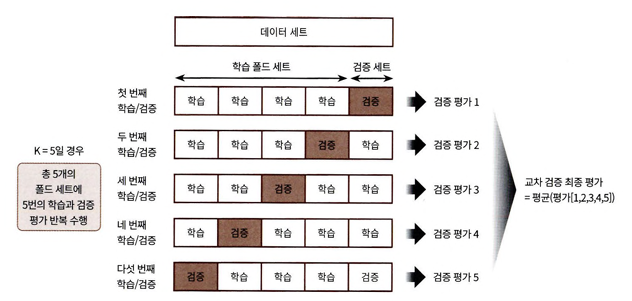

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris= load_iris()
features= iris.data
label= iris.target
dt_clf= DecisionTreeClassifier(random_state=156)

#5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold= KFold(n_splits=5)
cv_accuracy= []
print('붓꽃 데이터 세트 크기:', features.shape[0])

붓꽃 데이터 세트 크기: 150


In [18]:
#5개의 폴드 세트를 생성하는 KFold객체의 split() 호출
# -> 교차검증 수행 마다 예측 정확도 측정

n_iter=0

#KFold 객체의 split()을 호출하면 폴드별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
    #kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test= features[train_index], features[test_index]
    y_train, y_test= label[train_index], label[test_index]

    #학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred= dt_clf.predict(X_test)
    n_iter+=1

    #반복 시마다 정확도 측정
    accuracy= np.round(accuracy_score(y_test, pred),4) #accuracy_score(실제 정답, 모델 예측값)
    train_size= X_train.shape[0]
    test_size= X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
           .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

    #개별 iteration별 정확도를 합하여 평균 정확도 계산
    print('\n## 평균 검증 정확도:',np.mean(cv_accuracy) )


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

## 평균 검증 정확도: 1.0

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

## 평균 검증 정확도: 0.98335

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

## 평균 검증 정확도: 0.9444666666666667

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

## 평균 검증 정확도: 0.941675

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


**Stratified K 폴드**

:불균형한 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식
- 예시 ) 대출 사기 데이터
- 원본 데이터의 레이블 분포를 먼저 고려한 후 이 분포와 동일하게 학습, 검증 데이터 세트를 분배함
- 일반적으로 '분류'에서 교차검증할때 사용해야함

In [19]:
import pandas as pd

iris= load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']= iris.target
iris_df['label'].value_counts() #print 값, 3종류의 품종

,count
label,
0,50
1,50
2,50


In [20]:
kfold =KFold(n_splits=3)
n_iter=0
for train_index, test_index in kfold.split(iris_df):
    n_iter+=1
    label_train= iris_df['label'].iloc[train_index] #정수 배열인 train_index를 iloc에 넣음
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

# 3개의 폴드 세트로 학습-검증 레이블이 완전 다른 값으로 추출됨
# KFold -> 전체 레이블 값의 분포도 반영하지 못하는 문제 가짐

## 교차 검증: 1
학습 레이블 데이터 분포:
 label
1    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    50
Name: count, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 label
0    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    50
Name: count, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 label
0    50
1    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
2    50
Name: count, dtype: int64


In [21]:
#StratifiedKFold -> spilt() 메서드에 레이블 데이터 세트도 필요

from sklearn.model_selection import StratifiedKFold

skf= StratifiedKFold(n_splits=3)
n_iter=0

#split(X,y) -> feature 데이터(입력), label(정답)
for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter+=1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 label
2    34
0    33
1    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
1    17
2    16
Name: count, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 label
1    34
0    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
2    17
1    16
Name: count, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 label
0    34
1    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    17
2    17
0    16
Name: count, dtype: int64


In [22]:
#붓꽃 예제

dt_clf= DecisionTreeClassifier(random_state=156)

skfold= StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

#StratifiedKFold의 split() 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
    #split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test= features[train_index], features[test_index]
    y_train, y_test= label[train_index], label[test_index]

    #학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred= dt_clf.predict(X_test)

    #반복 시마다 정확도 측정
    n_iter+=1
    accuracy= np.round(accuracy_score(y_test, pred),4)
    train_size= X_train.shape[0]
    test_size= X_test.shape[0]
    print('\n{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
        .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy) #폴드 별 정확도 저장

#교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy,4))
print('## 평균 검증 정확도:', np.round(np.mean(cv_accuracy),4))


1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9667


###**cross_val_score()**
: 사이킷런이 제공하는 교차검증을 편리하게 해주는 API
> cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None,
pre_dispatch='2*n_jobs'). 이 중 estimator, X, y, scoring, cv가 주요 파라미터
- estimator -> Classifier / Regressor
- X -> 피처 데이터 세트
- Y -> 레이블 데이터 세트
- scoring -> 예측 성능 평가 지표
- cv -> 교차 검증 폴드 수

=> 반환 : scoring 파라미터로 지정된 성능 지표 측정값을 배열 형태로
*내부적으로 stratifiedKFold 이용*

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data= load_iris()
dt_clf=DecisionTreeClassifier(random_state=156)

data=iris_data.data
label=iris_data.target

#성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores= cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores,4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))

#

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


###**GridSearchCV**
: 교차 검증과 최적 하이퍼 파라미터 튜닝 한번에 하는 API
-  데이터 세트-> cross-validation을 위한 학습/테스트 세트로 자동 분할 + 하이퍼 파라미터 그리드에 기술된 모든 파라미터를 순차적으로 적용-> 최적의 파라미터 찾음
- 수행 시간 길다
1. params 칼럼에는 수행할 때마다 적용된 개별 하이퍼 파라미터값을 나타냅니다.
2. rank_test_socre는 하이퍼 파라미터별로 성능이 좋은 score 순위를 나타냅니다. 10| 가장 뛰어난 순위이며 이때의 파라
미터가 최적의 하이퍼 파라미터입니다.
3. mean_test_score는 개별 하이퍼 파라미터별로 CV의 폴딩 테스트 세트에 대해 총 수행한 평가 평균값입니다
- GridSearchCV 객체의 fit() 수행 -> 최고 성능을 나타낸 하이퍼 파라미터의 값 + 그때의 평가 결과 값이 각각 best_params_, best_score_ 속성에 기록됨

>일반적으로 학습 데이터를 GridSearchCV를 이용해 최적 하이퍼 파라미터 튜닝을 수행한 뒤에 별도의 테스트 세트에서 이를 평가함

In [24]:
grid_parameters={'max_depth': [1,2,3],
                 'min_samples_split': [2,3]}
#6회의 파라미터 조합 적용
#cv 가 3회 -> 3*6 = 18회의 학습, 평가

In [25]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris= load_iris()
X_train, X_test, y_train, y_test=train_test_split(iris_data.data, iris_data.target,
                                                  test_size=0.2, random_state=121)
dtree=DecisionTreeClassifier()

###파라미터를 딕셔너리 형태로 설정
parameters={'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [27]:
import pandas as pd

# param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정 .
# ## refit=True가 default임. True이면 가장 좋은 파라미터 설정으로 재학습시킴.
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

#붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가 .
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
 'split0_test_score', 'split1_test_score', 'split2_test_score']]

 #rank_test_score값이 1 -> 결과 예측 성능 1위

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [28]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750


In [29]:
#GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator= grid_dtree.best_estimator_

#GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습 필요없음
pred= estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.9667
